In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation


import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


# Step 1: Loading Dataset

In [2]:
df = pd.read_csv('Data\FS_Classification_AMZN_Historical_Quarterly_2009_2022_With_Fundamental_Data_Economic_Indicators.csv')

# Removing leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Using a regular expression to replace multiple spaces with a single space in all column names
df.columns = df.columns.str.replace(r'\s+', ' ', regex=True)  

# # Dropping columns that are not needed
df.drop(["Date", "Year"], axis=1, inplace=True)



# Step 2: Overview of Dataset

In [3]:
num_of_rows = len(df)
print(f"The number of rows is {num_of_rows}")
print('\n')

df.info()

The number of rows is 56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   RSI                                    56 non-null     float64
 1   Stochastic_Oscillator                  56 non-null     float64
 2   Price_Gap                              56 non-null     float64
 3   Federal_Funds_Rate_Quarterly           56 non-null     float64
 4   cashAndCashEquivalentsAtCarryingValue  56 non-null     float64
 5   totalNonCurrentAssets                  56 non-null     float64
 6   intangibleAssets                       56 non-null     float64
 7   shortTermInvestments                   56 non-null     float64
 8   otherCurrentAssets                     56 non-null     float64
 9   shortLongTermDebtTotal                 56 non-null     float64
 10  commonStock                            56 non-nul

In [4]:
df.head()

,RSI,Stochastic_Oscillator,Price_Gap,Federal_Funds_Rate_Quarterly,cashAndCashEquivalentsAtCarryingValue,totalNonCurrentAssets,intangibleAssets,shortTermInvestments,otherCurrentAssets,shortLongTermDebtTotal,...,interestExpense,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,Quarterly_Return,Volatility_Adjusted_Class
0,58.512097,65.430878,0.001450,0.183333,2.069308e+10,6.976287e+10,9.838672e+09,1.257367e+10,2.440475e+09,2.415570e+10,...,12000000.0,246000000.0,69000000.0,2.559672e+08,2.174295e+09,258000000.0,331000000.0,177000000.0,0.139161,3
1,55.309698,58.383477,-0.001254,0.180000,1.936000e+09,2.371000e+09,4.510000e+08,1.276000e+09,1.830000e+08,1.090000e+08,...,7000000.0,181000000.0,39000000.0,7.000000e+06,2.270000e+08,188000000.0,272000000.0,142000000.0,0.115946,3
2,53.239807,53.727712,-0.003992,0.156667,2.514000e+09,2.603000e+09,4.570000e+08,1.487000e+09,8.000000e+07,1.160000e+08,...,7000000.0,259000000.0,60000000.0,7.000000e+06,2.220000e+08,266000000.0,361000000.0,199000000.0,0.440874,3
3,63.826041,69.004807,0.027391,0.120000,3.444000e+09,4.016000e+09,5.670000e+08,2.922000e+09,2.720000e+08,2.520000e+08,...,8000000.0,469000000.0,85000000.0,8.000000e+06,3.630000e+08,477000000.0,589000000.0,384000000.0,0.009292,2
4,51.020327,48.488807,0.006992,0.133333,1.844000e+09,4.078000e+09,1.234000e+09,3.219000e+09,2.660000e+08,1.310000e+08,...,7000000.0,399000000.0,100000000.0,7.000000e+06,2.100000e+08,406000000.0,526000000.0,299000000.0,-0.195257,1


# Step 3: EDA - Missing Values Analysis 

## Step 3)i): EDA - Show Missing Values in each Column

In [5]:
def display_columns_with_null_values(df: pd.DataFrame):
    """
    Displays the total number of null values for each column in the dataframe,
    showing only columns that have null values.
    
    Parameters:
    - df (pd.DataFrame): The dataframe to be checked for null values.
    
    Returns:
    - None: Prints the columns with null values and their counts.
    """
    
    # Get total null values in each column
    total_null_values = df.isnull().sum()
    
    # Filter out columns that don't have any null values
    columns_with_null = total_null_values[total_null_values > 0].sort_values(ascending=False)
    
    # Check if there are any columns with null values
    if not columns_with_null.empty:
        print('-' * 64)
        print("Total null values in each column (only columns with null values)")
        print('-' * 64)
        print(columns_with_null)
    else:
        print('-' * 64)
        print("Total null values in each column (only columns with null values)")
        print('-' * 64)
        print("No columns have null values.")

In [6]:
# Get percentage of null values in each column
null_values_percentage = df.isnull().mean().round(4).mul(100).sort_values(ascending=False)
print('-' * 44)
print("Percentage(%) of null values in each column")
print('-' * 44)
print(null_values_percentage)
print('\n')

# Get total null values in each column
display_columns_with_null_values(df)


--------------------------------------------
Percentage(%) of null values in each column
--------------------------------------------
RSI                                      0.0
proceedsFromRepurchaseOfEquity           0.0
surprise                                 0.0
surprisePercentage                       0.0
operatingIncome                          0.0
sellingGeneralAndAdministrative          0.0
investmentIncomeNet                      0.0
netInterestIncome                        0.0
interestExpense                          0.0
incomeBeforeTax                          0.0
incomeTaxExpense                         0.0
interestAndDebtExpense                   0.0
comprehensiveIncomeNetOfTax              0.0
ebit                                     0.0
ebitda                                   0.0
netIncome_y                              0.0
Quarterly_Return                         0.0
netIncome_x                              0.0
paymentsForRepurchaseOfEquity            0.0
Stochastic_

## Step 3)ii): EDA - Handling Missing Values

In [7]:
# Fill Null Values in the Remaining Columns with the average of the column
numeric_df = df.select_dtypes(include=[np.number]) # Select only numeric columns
numeric_df.fillna(numeric_df.mean(), inplace=True)  # Fill missing values in numeric columns with the column mean
df[numeric_df.columns] = numeric_df # Merge back with non-numeric columns if needed

# Get total null values in each column
display_columns_with_null_values(df)


----------------------------------------------------------------
Total null values in each column (only columns with null values)
----------------------------------------------------------------
No columns have null values.


# Step 4: EDA - Duplicate Values Analysis 

## Step 4)i): EDA - Show Duplicate Values Rows

In [8]:
# Get percentage of duplicate rows
total_rows = len(df)
duplicate_rows = df.duplicated().sum()
duplicate_percentage = (duplicate_rows / total_rows) * 100

print('-' * 48)
print("Percentage(%) of duplicate rows in the DataFrame")
print('-' * 48)
print(f"{duplicate_percentage:.2f}%")
print('\n')

# Get total number of duplicate rows
print('-' * 30)
print("Total number of duplicate rows")
print('-' * 30)
print(duplicate_rows)


------------------------------------------------
Percentage(%) of duplicate rows in the DataFrame
------------------------------------------------
0.00%


------------------------------
Total number of duplicate rows
------------------------------
0


# Step 5): EDA - Feature Scaling 

## Step 5)i): EDA - Categorical Feature Scaling

## Step 5)ii): EDA - Numerical Feature Scaling

In [9]:
df.head()

,RSI,Stochastic_Oscillator,Price_Gap,Federal_Funds_Rate_Quarterly,cashAndCashEquivalentsAtCarryingValue,totalNonCurrentAssets,intangibleAssets,shortTermInvestments,otherCurrentAssets,shortLongTermDebtTotal,...,interestExpense,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,Quarterly_Return,Volatility_Adjusted_Class
0,58.512097,65.430878,0.001450,0.183333,2.069308e+10,6.976287e+10,9.838672e+09,1.257367e+10,2.440475e+09,2.415570e+10,...,12000000.0,246000000.0,69000000.0,2.559672e+08,2.174295e+09,258000000.0,331000000.0,177000000.0,0.139161,3
1,55.309698,58.383477,-0.001254,0.180000,1.936000e+09,2.371000e+09,4.510000e+08,1.276000e+09,1.830000e+08,1.090000e+08,...,7000000.0,181000000.0,39000000.0,7.000000e+06,2.270000e+08,188000000.0,272000000.0,142000000.0,0.115946,3
2,53.239807,53.727712,-0.003992,0.156667,2.514000e+09,2.603000e+09,4.570000e+08,1.487000e+09,8.000000e+07,1.160000e+08,...,7000000.0,259000000.0,60000000.0,7.000000e+06,2.220000e+08,266000000.0,361000000.0,199000000.0,0.440874,3
3,63.826041,69.004807,0.027391,0.120000,3.444000e+09,4.016000e+09,5.670000e+08,2.922000e+09,2.720000e+08,2.520000e+08,...,8000000.0,469000000.0,85000000.0,8.000000e+06,3.630000e+08,477000000.0,589000000.0,384000000.0,0.009292,2
4,51.020327,48.488807,0.006992,0.133333,1.844000e+09,4.078000e+09,1.234000e+09,3.219000e+09,2.660000e+08,1.310000e+08,...,7000000.0,399000000.0,100000000.0,7.000000e+06,2.100000e+08,406000000.0,526000000.0,299000000.0,-0.195257,1


In [10]:
from sklearn.preprocessing import StandardScaler

def standard_scale_dataframe(dataframe, columns_to_scale):
    """
    Scales the specified columns of the DataFrame using Standard Scaling (Z-score normalization).
    :param dataframe: pandas DataFrame
    :param columns_to_scale: list of strings, names of columns to scale
    :return: DataFrame with scaled columns
    """
    # Create a copy of the DataFrame to avoid modifying the original one
    df_scaled = dataframe.copy()

    # Initialize the Standard Scaler
    scaler = StandardScaler()

    # Perform Standard Scaling on specified columns and update the DataFrame
    df_scaled[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])

    return df_scaled


columns = list(df.columns)

numerical_features = columns
numerical_features.remove('Volatility_Adjusted_Class')

scaled_df = standard_scale_dataframe(dataframe=df, 
                                    columns_to_scale=numerical_features)

df = scaled_df
df.head()

,RSI,Stochastic_Oscillator,Price_Gap,Federal_Funds_Rate_Quarterly,cashAndCashEquivalentsAtCarryingValue,totalNonCurrentAssets,intangibleAssets,shortTermInvestments,otherCurrentAssets,shortLongTermDebtTotal,...,interestExpense,incomeBeforeTax,incomeTaxExpense,interestAndDebtExpense,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome_y,Quarterly_Return,Volatility_Adjusted_Class
0,0.525744,0.675243,-0.362915,-0.507676,0.321669,0.140477,0.208752,0.015385,0.047263,0.255085,...,-0.955759,-0.453960,-0.314132,0.263138,0.254351,-0.497881,-0.789268,-0.454839,0.397042,3
1,0.071870,0.050056,-0.382570,-0.511715,-1.076058,-0.949299,-1.076658,-0.785483,-0.277015,-1.072005,...,-0.981151,-0.474491,-0.374411,-1.011076,-0.409375,-0.519322,-0.804095,-0.467267,0.254656,3
2,-0.221494,-0.362965,-0.402474,-0.539991,-1.032987,-0.945547,-1.075836,-0.770526,-0.291811,-1.071619,...,-0.981151,-0.449853,-0.332215,-1.011076,-0.411080,-0.495430,-0.781729,-0.447027,2.247496,3
3,1.278884,0.992292,-0.174354,-0.584426,-0.963686,-0.922698,-1.060775,-0.668802,-0.264231,-1.064113,...,-0.976073,-0.383523,-0.281983,-1.005958,-0.363020,-0.430799,-0.724430,-0.381333,-0.399466,2
4,-0.536058,-0.827717,-0.322631,-0.568268,-1.082914,-0.921695,-0.969445,-0.647748,-0.265093,-1.070791,...,-0.981151,-0.405633,-0.251844,-1.011076,-0.415170,-0.452547,-0.740263,-0.411517,-1.653999,1


# Step 9) Train Test Split

In [11]:
df['Volatility_Adjusted_Class'].value_counts().sort_index()

Volatility_Adjusted_Class
0     3
1     7
2    12
3    27
4     7
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("Volatility_Adjusted_Class", axis=1)
y = df["Volatility_Adjusted_Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    shuffle=False)

# Step 10) XGBoost Model

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def Confusion_Matrix_For_Multi_Class_With_Overview(title, y_test, y_pred):
    """
    Create a confusion matrix for multi-class classification with detailed overview.

    Parameters:
    - title: Title for the confusion matrix plot.
    - y_test: True labels of the test data.
    - y_pred: Predicted labels of the test data.

    Returns:
    - A seaborn heatmap representing the confusion matrix.
    """

    # Creating the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # Determine class labels
    class_labels = np.unique(np.concatenate((y_test, y_pred)))

    # Calculate the counts and percentages for the confusion matrix
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    
    # Calculate TP and FP percentages
    TP_percentages = ["{0:.2%}".format(value/np.sum(cf_matrix, axis=1)[i]) for i, value in enumerate(np.diag(cf_matrix))]
    FP_percentages = ["{0:.2%}".format((np.sum(cf_matrix, axis=0)[i] - value)/np.sum(cf_matrix)) for i, value in enumerate(np.diag(cf_matrix))]
    
    # Combine TP and FP with their percentages
    combined_info = []
    for i in range(cf_matrix.shape[0]):
        for j in range(cf_matrix.shape[1]):
            value = cf_matrix[i, j]
            if i == j:  # True Positive
                combined_info.append(f"{value}\n(TP: {TP_percentages[i]})")
            else:  # False Positive
                combined_info.append(f"{value}\n(FP: {FP_percentages[j]})")

    labels = np.asarray(combined_info).reshape(cf_matrix.shape)

    # Plotting the heatmap
    plt.figure(figsize=(8, 8))
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    ax.set_title(f'{title}\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')

    # Show the plot
    plt.show()

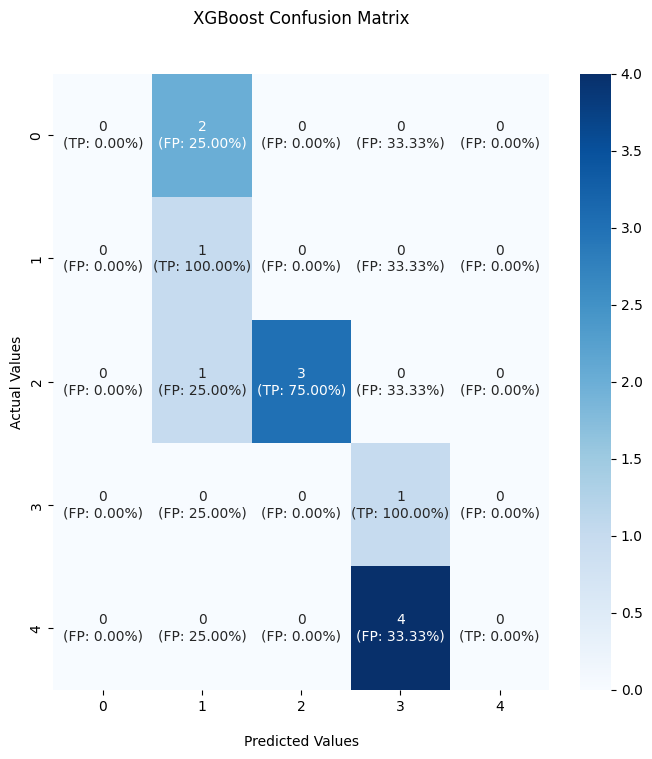

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.25      1.00      0.40         1
           2       1.00      0.75      0.86         4
           3       0.20      1.00      0.33         1
           4       0.00      0.00      0.00         4

    accuracy                           0.42        12
   macro avg       0.29      0.55      0.32        12
weighted avg       0.37      0.42      0.35        12



In [14]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

def XGBoost_Train_Evaluate(X_train, X_test, y_train, y_test, 
                           objective='multi:softmax', num_class=None, 
                           n_estimators=100, learning_rate=0.1, max_depth=6, 
                           subsample=1.0, colsample_bytree=1.0, gamma=0, 
                           reg_alpha=0, reg_lambda=1, verbosity=1, random_state=42, verbose=False):
   
    model = xgb.XGBClassifier(
        objective=objective,
        num_class=num_class,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        verbosity=verbosity,
        random_state=random_state,
        use_label_encoder=False  # Avoids warning in newer versions of XGBoost
    )

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=verbose)
    y_pred = model.predict(X_test).flatten()  # Ensure y_pred is a 1D array
    
    df = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()})
    
    Confusion_Matrix_For_Multi_Class_With_Overview("XGBoost Confusion Matrix", y_test, y_pred)
    print(classification_report(y_test, y_pred))
    
    return df



"""
Best Parameters: {
    'n_estimators': 366, 
    'learning_rate': 0.4594259565422311,
    'max_depth': 3, 
    'subsample': 0.5163571458564111, 
    'colsample_bytree': 0.5547050899403205, 
    'gamma': 1.0546559043221597, 
    'reg_alpha': 0.29203039952794485, 
    'reg_lambda': 2.1708419038837645
    }
    
Best Score: 0.4429142292773435

"""


# Best Parameters example
XGBoost_df = XGBoost_Train_Evaluate(X_train, X_test, y_train, y_test, 
                                    objective='multi:softmax', 
                                    num_class=5, # Update based on your specific number of classes
                                    n_estimators=366, 
                                    learning_rate=0.4594, 
                                    max_depth=3, 
                                    subsample=0.5163, 
                                    colsample_bytree=0.5547, 
                                    gamma=1.0546, 
                                    reg_alpha=0.2920, 
                                    reg_lambda=2.1708, 
                                    verbosity=1, 
                                    random_state=42, 
                                    verbose=False)

# Step 11) XGBoost Hyperparameter Tuning

In [15]:
# import optuna
# from sklearn.model_selection import cross_val_score
# import pandas as pd


# # Suppress Optuna output
# optuna.logging.set_verbosity(optuna.logging.CRITICAL)

# # Objective function for Optuna
# def objective(trial):
#     params = {
#         'objective': 'multi:softmax',
#         'num_class': 4,  # Update based on your specific number of classes
#         'n_estimators': trial.suggest_int('n_estimators', 50, 500),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 10),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
#         'random_state': 42,
#         'use_label_encoder': False
#     }
#     model = xgb.XGBClassifier(**params)
#     score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro', n_jobs=-1, verbose=0)
#     return score.mean()



# # Create a study and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=500, timeout=None, show_progress_bar=True)

# # Print the best parameters and the best score
# print("Best Parameters:", study.best_params)
# print("Best Score:", study.best_value)

# # Get the detailed study results
# df = study.trials_dataframe()
# df_sorted = df.sort_values('value', ascending=False)
# df_sorted.head()